# 範例

根據以下的參考點，嘗試做透視變換

```
point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)
```

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../Part01/lena.png')

## 透視轉換

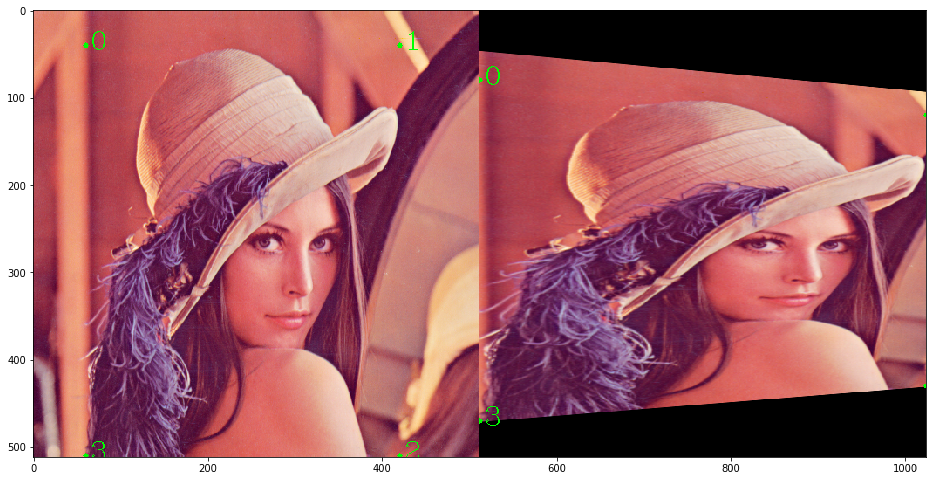

In [11]:
img_perspective = img.copy()
h, w = img.shape[:2]

# 設定四對點，並取得 perspective 矩陣
point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)
M = cv2.getPerspectiveTransform(point1, point2)

# perspective 轉換
img_perspective = cv2.warpPerspective(img, M, (w, h))

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(point1):
    pts = tuple(map(int, pts))
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

for idx, pts in enumerate(point2):
    pts = tuple(map(int, pts))
    cv2.circle(img_perspective, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_perspective, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    
## 組合 + 顯示圖片
img_show = np.hstack((img_copy, img_perspective))
#while True:
#    cv2.imshow('perspective transform', img_show)
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break

#OpenCV is BGR Cover to Plt RGB
b,g,r = cv2.split(img_show)  
img_show_ = cv2.merge([r,g,b]) 
plt.figure(num='astronaut',figsize=(16,16))  #创建一个名为astronaut的窗口,并设置大小 
plt.imshow(img_show_)
plt.show()